In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch # for dengogram
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [10]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [12]:
df = sns.load_dataset('planets')

In [14]:
subdf = df[['orbital_period','mass','distance']].copy()

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
imp = SimpleImputer()

In [23]:
clean_df = pd.DataFrame(imp.fit_transform(subdf),columns=subdf.columns.tolist())

In [24]:
clean_df.describe()

,orbital_period,mass,distance
count,1035.000000,1035.000000,1035.000000
mean,2002.917596,2.638161,264.069282
std,25468.059298,2.687081,647.663598
min,0.090706,0.003600,1.350000
25%,5.747860,1.285000,38.010000
50%,49.532000,2.638161,105.490000
75%,673.550000,2.638161,264.069282
max,730000.000000,25.000000,8500.000000


In [25]:
px.scatter_3d(clean_df, x='orbital_period',y='mass',z='distance')

In [27]:
x=  clean_df[['mass','distance']]

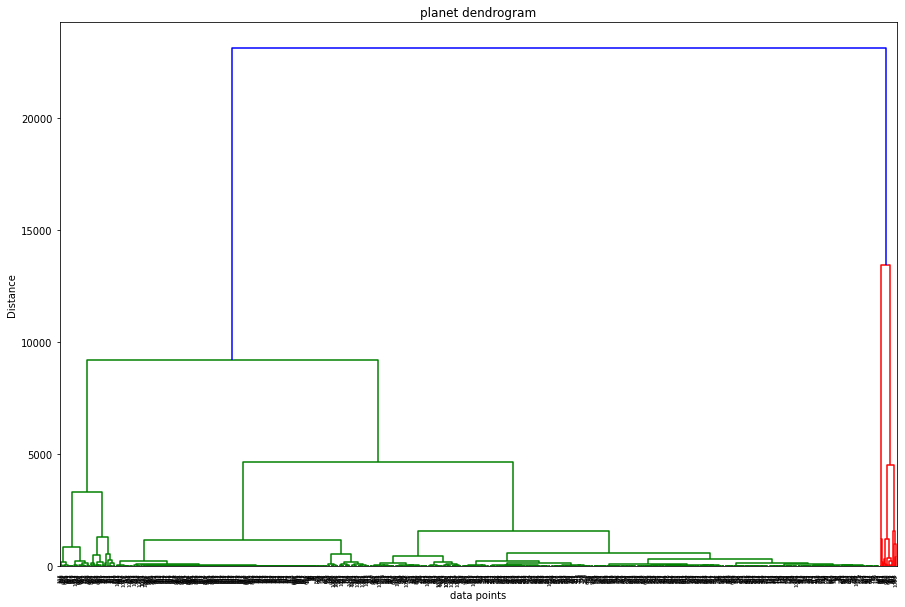

In [28]:
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(x,method='ward'))
plt.title("planet dendrogram")
plt.xlabel('data points')
plt.ylabel('Distance')
plt.show()

In [29]:
value = 2
model = AgglomerativeClustering(n_clusters=value)
ypred = model.fit_predict(x)

In [32]:
clean_df['group'] = ypred

In [33]:
px.scatter_3d(clean_df, x='orbital_period',y='mass',z='distance',color='group')

In [34]:
df =sns.load_dataset('iris')

In [35]:
df.columns.to_list()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [43]:
iris = df[['sepal_length', 'petal_width']]

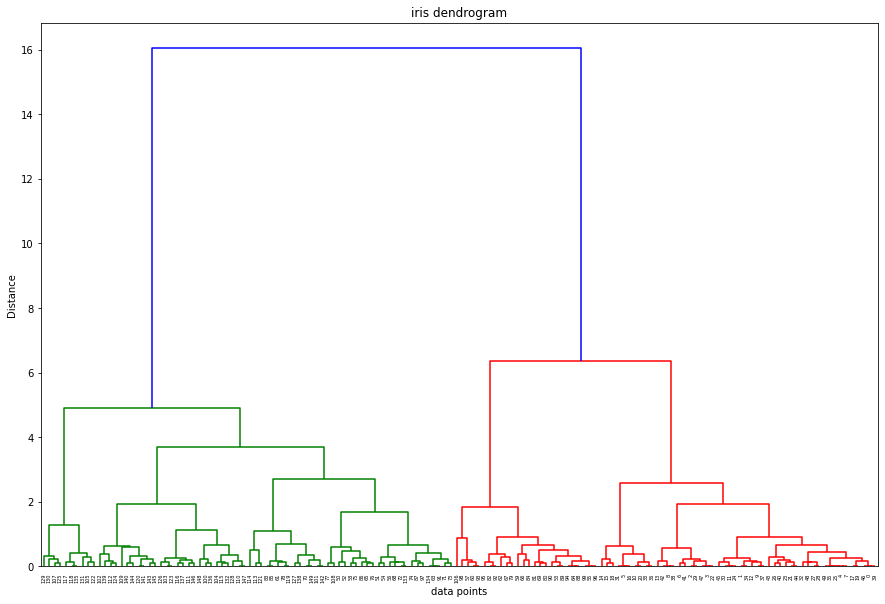

In [44]:
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(iris,method='ward'))
plt.title("iris dendrogram")
plt.xlabel('data points')
plt.ylabel('Distance')
plt.show()

In [45]:
value = 2
model = AgglomerativeClustering(n_clusters=value)
df['group_sepal'] = model.fit_predict(iris)

px.scatter_3d(df,x= 'sepal_length',y='petal_width', z='petal_length',color='group_sepal',)